In [2]:
'''
This code is used to process the summer data in 2021，by person
'''
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt


0       1.8
1       1.5
2       1.0
3       1.2
4       1.0
       ... 
3876    2.0
3877    2.5
3878    2.5
3879    2.0
3880    1.0
Name: thermal sensation, Length: 3881, dtype: float64
<class 'numpy.int64'>


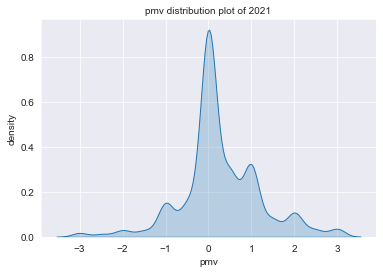

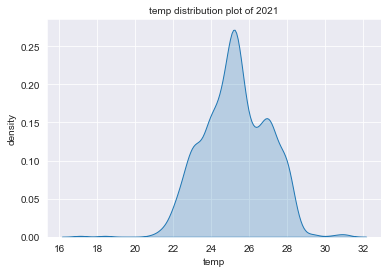

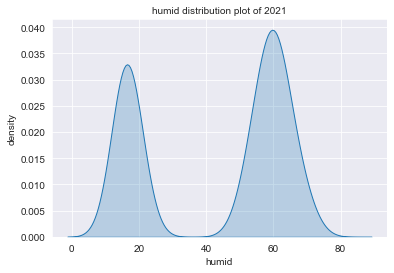

In [3]:
# 读取2021年所有数据
df = pd.read_csv('../../dataset/merge/2021_dateset.csv',encoding="utf-8")
print(df['thermal sensation'])
df.dropna(axis=0,how='any')
print(type(df.iloc[13,0]))
# 查看PMV分布
pmv_distribution = sns.kdeplot(df['thermal sensation'], shade=True)
pmv_distribution.axes.set_title('pmv distribution plot of 2021', fontsize=10)
pmv_distribution.set_xlabel('pmv', fontsize=10)
pmv_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/all/pmv distribution plot of 2021',dpi=200, bbox_inches='tight')
plt.show()

# 查看2021年夏季温度分布
temp_distribution = sns.kdeplot(df['temp'], shade=True)
temp_distribution.axes.set_title('temp distribution plot of 2021', fontsize=10)
temp_distribution.set_xlabel('temp', fontsize=10)
temp_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/all/temp distribution plot of 2021',dpi=200, bbox_inches='tight')
plt.show()

# 查看2021年夏季湿度分布
humid_distribution = sns.kdeplot(df['humid'], shade=True)
humid_distribution.axes.set_title('humid distribution plot of 2021', fontsize=10)
humid_distribution.set_xlabel('humid', fontsize=10)
humid_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/all/humid distribution plot of 2021',dpi=200, bbox_inches='tight')
plt.show()

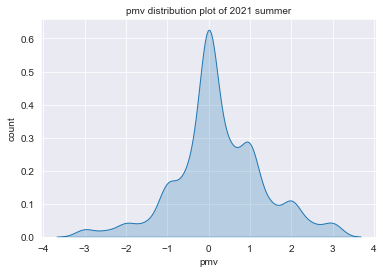

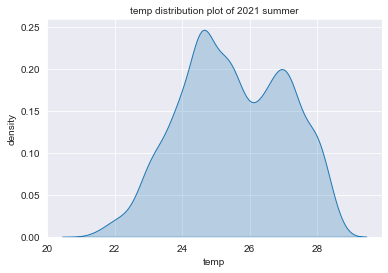

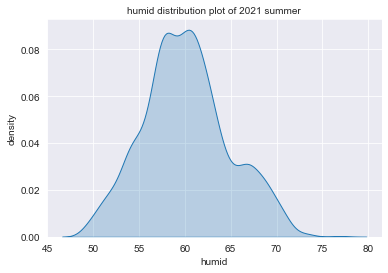

In [13]:
# 读取2021年夏季数据并查看PMV分布

df = pd.read_csv('../../dataset/summer/summer_2021_by_person.csv',encoding="gbk")
df.dropna(axis=0,how='any',inplace = True)

pmv_distribution = sns.kdeplot(df['thermal sensation'], shade=True)
pmv_distribution.axes.set_title('pmv distribution plot of 2021 summer', fontsize=10)
pmv_distribution.set_xlabel('pmv', fontsize=10)
pmv_distribution.set_ylabel('count', fontsize=10)
plt.savefig('../result/summer/pmv distribution plot of 2021 summer',dpi=200, bbox_inches='tight')
plt.show()

# 查看2021年夏季温度分布
temp_distribution = sns.kdeplot(df['temp'], shade=True)
temp_distribution.axes.set_title('temp distribution plot of 2021 summer', fontsize=10)
temp_distribution.set_xlabel('temp', fontsize=10)
temp_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/summer/temp distribution plot of 2021 summer',dpi=200, bbox_inches='tight')
plt.show()

# 查看2021年夏季湿度分布
humid_distribution = sns.kdeplot(df['humid'], shade=True)
humid_distribution.axes.set_title('humid distribution plot of 2021 summer', fontsize=10)
humid_distribution.set_xlabel('humid', fontsize=10)
humid_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/summer/humid distribution plot of 2021 summer',dpi=200, bbox_inches='tight')
plt.show()


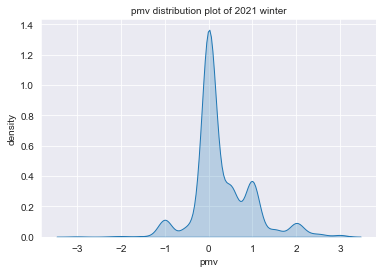

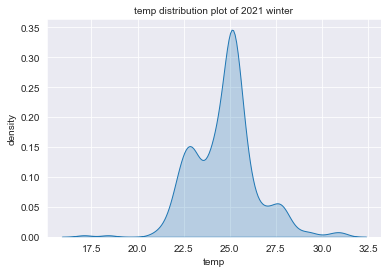

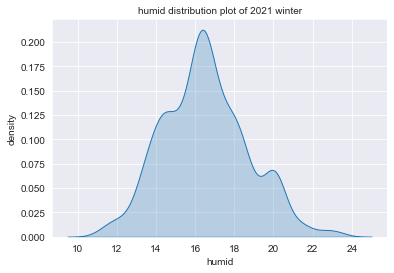

In [5]:
# 读取2021年冬季季数据并查看PMV分布
df = pd.read_csv('../../dataset/winter/winter_2021_by_person.csv',encoding="gbk")
df.dropna(axis=0,how='any')


pmv_distribution = sns.kdeplot(df['thermal sensation'], shade=True)
pmv_distribution.axes.set_title('pmv distribution plot of 2021 winter', fontsize=10)
pmv_distribution.set_xlabel('pmv', fontsize=10)
pmv_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/winter/pmv distribution plot of 2021 winter',dpi=200, bbox_inches='tight')
plt.show()


# 查看2021年冬季温度分布
temp_distribution = sns.kdeplot(df['temp'], shade=True)
temp_distribution.axes.set_title('temp distribution plot of 2021 winter', fontsize=10)
temp_distribution.set_xlabel('temp', fontsize=10)
temp_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/winter/temp distribution plot of 2021 winter',dpi=200, bbox_inches='tight')
plt.show()

# 查看2021年冬季温度分布
humid_distribution = sns.kdeplot(df['humid'], shade=True)
humid_distribution.axes.set_title('humid distribution plot of 2021 winter', fontsize=10)
humid_distribution.set_xlabel('humid', fontsize=10)
humid_distribution.set_ylabel('density', fontsize=10)
plt.savefig('../result/winter/humid distribution plot of 2021 winter',dpi=200, bbox_inches='tight')
plt.show()